In [102]:
import numpy as np 
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [103]:
articles = pd.read_csv('/content/drive/MyDrive/projectAI/articles.csv')
customers = pd.read_csv('/content/drive/MyDrive/projectAI/customers.csv')
transactions = pd.read_csv('/content/drive/MyDrive/projectAI/transactions_train.csv')

In [104]:
customer_columns = customers.columns
articles_columns = articles.columns
transactions_columns = transactions.columns

Basic info about the dataframes.

In [105]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [106]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [107]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


**Transactions**

In [108]:
print(f"Total number of transactions is {transactions.shape[0]}.")
for column in transactions_columns:
  na_transactions = transactions[column].isna().sum()
  print(f"{na_transactions} have no {column}, which is {na_transactions/transactions.shape[0]*100}%.")

Total number of transactions is 31788324.
0 have no t_dat, which is 0.0%.
0 have no customer_id, which is 0.0%.
0 have no article_id, which is 0.0%.
0 have no price, which is 0.0%.
0 have no sales_channel_id, which is 0.0%.


Information about the date

count       31788324
unique           734
top       2019-09-28
freq          198622
Name: t_dat, dtype: object
start date = 2018-09-20
end date = 2020-09-22
total dates = 734


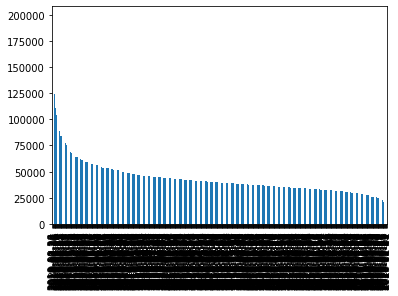

In [109]:
print(transactions["t_dat"].describe())
print(f"start date = {min(transactions['t_dat'])}")
print(f"end date = {max(transactions['t_dat'])}")
print("total dates =", 366+365+3)
transactions["t_dat"].value_counts().plot.bar()

Information age

In [110]:
print(transactions["customer_id"].describe())


count                                              31788324
unique                                              1362281
top       be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...
freq                                                   1895
Name: customer_id, dtype: object


Do all articles and customers in transactions exist?

In [111]:
transactions["customerbool"] = transactions.customer_id.isin(customers.customer_id).astype(str)
print(transactions.customerbool.unique())

['True']


In [112]:
transactions["articlebool"] = transactions.article_id.isin(articles.article_id.map(int)).astype(str)
print(transactions.articlebool.unique())

['True']


Information about article id

In [113]:
print(transactions["article_id"].describe())

count    3.178832e+07
mean     6.962272e+08
std      1.334480e+08
min      1.087750e+08
25%      6.328030e+08
50%      7.145820e+08
75%      7.865240e+08
max      9.562170e+08
Name: article_id, dtype: float64


Info about sales channels

In [114]:
print(transactions["sales_channel_id"].describe())
print(len(transactions.sales_channel_id.unique()))

count    3.178832e+07
mean     1.704028e+00
std      4.564786e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: sales_channel_id, dtype: float64
2


Info about the price

In [115]:
print(transactions["price"].describe())
print(transactions.price.quantile(0.99))

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64
0.1002203389830508


**Customers**

Missing values

In [116]:
print(f"Total number of customer is {customers.shape[0]}.")
for column in customer_columns:
  na_users = customers[column].isna().sum()
  print(f"{na_users} have no {column}, which is {na_users/customers.shape[0]*100}%.")

Total number of customer is 1371980.
0 have no customer_id, which is 0.0%.
895050 have no FN, which is 65.23783145526903%.
907576 have no Active, which is 66.15081852505138%.
6062 have no club_member_status, which is 0.44184317555649494%.
16009 have no fashion_news_frequency, which is 1.1668537442236768%.
15861 have no age, which is 1.1560664149623172%.
0 have no postal_code, which is 0.0%.


Amount of customers that did not have a transaction

In [117]:
customers["customerbool"] = customers.customer_id.isin(transactions.customer_id).astype(int)
print("No transactions", customers[customers["customerbool"]==0].shape[0])
print("number of customers", customers.shape)

No transactions 9699
number of customers (1371980, 8)


Check length of customer id

In [118]:
print(f"Total number of customer is {customers.shape[0]}.")
print(len(customers.customer_id.unique()))
print(customers.customer_id.describe())
customers["customers_length"]= customers["customer_id"].str.len()
print(customers.customers_length.describe())

Total number of customer is 1371980.
1371980
count                                               1371980
unique                                              1371980
top       00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
freq                                                      1
Name: customer_id, dtype: object
count    1371980.0
mean          64.0
std            0.0
min           64.0
25%           64.0
50%           64.0
75%           64.0
max           64.0
Name: customers_length, dtype: float64


Basic information about columns

In [119]:
print(customers.FN.describe())
print(len(customers.FN.unique()))

count    476930.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: FN, dtype: float64
2


In [120]:
print(customers.Active.describe())
print(len(customers.FN.unique()))

count    464404.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Active, dtype: float64
2


In [121]:
print(customers.club_member_status.describe())
print(customers.club_member_status.unique())

count     1365918
unique          3
top        ACTIVE
freq      1272491
Name: club_member_status, dtype: object
['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']


In [122]:
print(customers.fashion_news_frequency.describe())
print(customers.fashion_news_frequency.unique())

count     1355971
unique          4
top          NONE
freq       877711
Name: fashion_news_frequency, dtype: object
['NONE' 'Regularly' nan 'Monthly' 'None']


In [123]:
print(customers.age.describe())
print(customers.age.unique())

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64
[49. 25. 24. 54. 52. nan 20. 32. 29. 31. 56. 75. 41. 27. 30. 48. 35. 22.
 40. 38. 45. 68. 55. 19. 60. 44. 21. 26. 28. 53. 33. 17. 23. 51. 18. 34.
 57. 47. 70. 50. 63. 58. 43. 67. 72. 42. 39. 79. 71. 59. 36. 62. 37. 46.
 73. 64. 74. 61. 85. 69. 76. 66. 65. 82. 16. 90. 80. 78. 81. 84. 77. 97.
 89. 83. 98. 88. 86. 87. 93. 91. 99. 96. 94. 92. 95.]


Distribution age

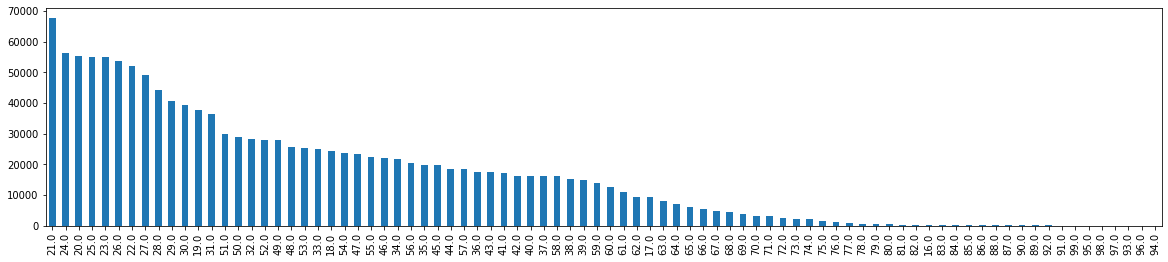

In [124]:
customers["age"].value_counts().plot.bar(figsize=(20,4))

Check length of postal code

In [125]:
print(customers.postal_code.describe())
print(len(customers.postal_code.unique()))
customers["postal_code_length"]= customers["postal_code"].str.len()
print(customers.postal_code_length.describe())

count                                               1371980
unique                                               352899
top       2c29ae653a9282cce4151bd87643c907644e09541abc28...
freq                                                 120303
Name: postal_code, dtype: object
352899
count    1371980.0
mean          64.0
std            0.0
min           64.0
25%           64.0
50%           64.0
75%           64.0
max           64.0
Name: postal_code_length, dtype: float64


Check if there is a relation between fashion and club member status

In [126]:
customers["status_fashion"] = customers['club_member_status'].map(str) + '-' + customers['fashion_news_frequency'].map(str) 
print(customers.status_fashion.unique())
print(customers.status_fashion.describe())


['ACTIVE-NONE' 'ACTIVE-Regularly' 'nan-nan' 'PRE-CREATE-Regularly'
 'PRE-CREATE-NONE' 'ACTIVE-nan' 'PRE-CREATE-nan' 'nan-NONE'
 'nan-Regularly' 'ACTIVE-Monthly' 'LEFT CLUB-NONE' 'PRE-CREATE-Monthly'
 'nan-Monthly' 'LEFT CLUB-Regularly' 'ACTIVE-None']
count         1371980
unique             15
top       ACTIVE-NONE
freq           788482
Name: status_fashion, dtype: object


**Articles**

Missing values

In [127]:
print(f"Total number of articles is {articles.shape[0]}.")
for column in articles_columns:
  na_articles = articles[column].isna().sum()
  print(f"{na_articles} have no {column}, which is {na_articles/articles.shape[0]*100}%.")

Total number of articles is 105542.
0 have no article_id, which is 0.0%.
0 have no product_code, which is 0.0%.
0 have no prod_name, which is 0.0%.
0 have no product_type_no, which is 0.0%.
0 have no product_type_name, which is 0.0%.
0 have no product_group_name, which is 0.0%.
0 have no graphical_appearance_no, which is 0.0%.
0 have no graphical_appearance_name, which is 0.0%.
0 have no colour_group_code, which is 0.0%.
0 have no colour_group_name, which is 0.0%.
0 have no perceived_colour_value_id, which is 0.0%.
0 have no perceived_colour_value_name, which is 0.0%.
0 have no perceived_colour_master_id, which is 0.0%.
0 have no perceived_colour_master_name, which is 0.0%.
0 have no department_no, which is 0.0%.
0 have no department_name, which is 0.0%.
0 have no index_code, which is 0.0%.
0 have no index_name, which is 0.0%.
0 have no index_group_no, which is 0.0%.
0 have no index_group_name, which is 0.0%.
0 have no section_no, which is 0.0%.
0 have no section_name, which is 0.0%.
0

Mising values with -1 or Unknown

In [128]:
print(f"Total number of articles is {articles.shape[0]}.")
for column in articles_columns:
  na_articles = articles[articles[column]!=-1]
  na_articles = articles.shape[0]-na_articles[na_articles[column]!="Unknown"].shape[0]
  print(f"{na_articles} have no {column}, which is {na_articles/articles.shape[0]*100}%.")

Total number of articles is 105542.
0 have no article_id, which is 0.0%.
0 have no product_code, which is 0.0%.
0 have no prod_name, which is 0.0%.
121 have no product_type_no, which is 0.11464630194614467%.
121 have no product_type_name, which is 0.11464630194614467%.
121 have no product_group_name, which is 0.11464630194614467%.
52 have no graphical_appearance_no, which is 0.04926948513388035%.
52 have no graphical_appearance_name, which is 0.04926948513388035%.
28 have no colour_group_code, which is 0.02652972276439711%.
28 have no colour_group_name, which is 0.02652972276439711%.
28 have no perceived_colour_value_id, which is 0.02652972276439711%.
28 have no perceived_colour_value_name, which is 0.02652972276439711%.
685 have no perceived_colour_master_id, which is 0.6490307176290008%.
685 have no perceived_colour_master_name, which is 0.6490307176290008%.
0 have no department_no, which is 0.0%.
0 have no department_name, which is 0.0%.
0 have no index_code, which is 0.0%.
0 have n

Amount of articles that did not get bought

In [129]:
articles["articlebool"] = articles.article_id.isin(transactions.article_id.map(str)).astype(int)
print("No transactions", articles[articles["articlebool"]==0].shape[0])
print("number of articles", articles.shape[0])

No transactions 105542
number of articles 105542


Check if there is a factor that determins if a row has no description

In [130]:
na_articles = articles[articles['detail_desc'].isna()]
for col in na_articles:
    print(len(na_articles[col].unique()))

416
178
187
45
45
8
24
24
40
40
7
7
18
18
100
91
10
10
5
5
41
41
21
21
1
1


Get all basic info about each column (incloding number of unique value)

In [131]:
for column in articles_columns:
  print(f"{column}:")
  print(len(articles[column].unique()))
  print(articles[column].describe())
  print("")

article_id:
105542
count    1.055420e+05
mean     6.984246e+08
std      1.284624e+08
min      1.087750e+08
25%      6.169925e+08
50%      7.022130e+08
75%      7.967030e+08
max      9.594610e+08
Name: article_id, dtype: float64

product_code:
47224
count    105542.000000
mean     698424.563378
std      128462.384432
min      108775.000000
25%      616992.500000
50%      702213.000000
75%      796703.000000
max      959461.000000
Name: product_code, dtype: float64

prod_name:
45875
count              105542
unique              45875
top       Dragonfly dress
freq                   98
Name: prod_name, dtype: object

product_type_no:
132
count    105542.000000
mean        234.861875
std          75.049308
min          -1.000000
25%         252.000000
50%         259.000000
75%         272.000000
max         762.000000
Name: product_type_no, dtype: float64

product_type_name:
131
count       105542
unique         131
top       Trousers
freq         11169
Name: product_type_name, dtype: obj

Check length article ids

In [132]:
articles["article_id"] = articles['article_id'].map(str)
articles["article_length"]= articles["article_id"].str.len()
print(articles.article_length.describe())

count    105542.0
mean          9.0
std           0.0
min           9.0
25%           9.0
50%           9.0
75%           9.0
max           9.0
Name: article_length, dtype: float64


Check if numbers and names are used consitently.

In [133]:
articles["name_code"] = articles['prod_name'].map(str) + '-' + articles['product_code'].map(str) 
print(articles.name_code.describe())
print(f"combined {len(articles.name_code.unique())}")
print(f"code {len(articles.prod_name.unique())}")
print(f"name {len(articles.product_code.unique())}")

count                          105542
unique                          49812
top       Wow printed tee 6.99-684021
freq                               70
Name: name_code, dtype: object
combined 49812
code 45875
name 47224


In [134]:
articles["name_code"] = articles['product_type_no'].map(str) + '-' + articles['product_type_name'].map(str) 
print(articles.name_code.describe())
print(f"code {len(articles.product_type_no.unique())}")
print(f"name {len(articles.product_type_name.unique())}")

count           105542
unique             132
top       272-Trousers
freq             11169
Name: name_code, dtype: object
code 132
name 131


In [135]:
articles["name_code"] = articles['product_type_no'].map(str) + '-' + articles['product_type_name'].map(str) 
print(articles.name_code.describe())
print(f"code {len(articles.product_type_no.unique())}")
print(f"name {len(articles.product_type_name.unique())}")

count           105542
unique             132
top       272-Trousers
freq             11169
Name: name_code, dtype: object
code 132
name 131


In [136]:
articles.perceived_colour_master_name.unique()

array(['Black', 'White', 'Beige', 'Grey', 'Blue', 'Pink', 'Lilac Purple',
       'Red', 'Mole', 'Orange', 'Metal', 'Brown', 'Turquoise', 'Yellow',
       'Khaki green', 'Green', 'undefined', 'Unknown', 'Yellowish Green',
       'Bluish Green'], dtype=object)